<AxesSubplot:xlabel='RiskCategory'>

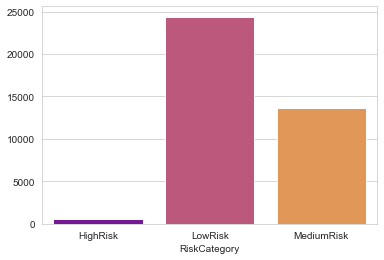

In [11]:
# Program to evaluate the risk associated in lending the loan to a loan applicant using the online data set and provide remonedations
#Import the necessary modules to load data to data frames and draw plots
import os
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

#Read and load the data set to data frame
os.chdir('C:\\Users\\SudheendraGogi\\Downloads')
df = pd.read_csv('C:\\Users\\SudheendraGogi\\Downloads\\loan\\loan_upd.csv')

#Filter the loan applications that are currently active
df2=df.loc[df.loan_status != "Current"]

#Derive 4 columns to performing binning activity on key driver variables.
#Also data has been standardised to populate zero as default value for  mths_since_last_delinq and mths_since_last_delinq
df2['DPDCategory']=df2['mths_since_last_delinq'].fillna(0).apply(lambda x : 'DPDShort' if (x>=0.0 and x <=3 ) else ('DPDMedium' if (x >= 4 and x <= 6 ) else ('DPDLong' if (x >=7 and x <= 12 ) else ('DPDVeryLong' if x > 12 else 'TooHigh')) ) )
df2['IncomeCategory']=df2['annual_inc'].apply(lambda x : 'LowSal' if (x > 9500 and x <= 18000 ) else ('MediumSal' if (x > 18001 and x <= 50000 ) else ('HighSal' if (x > 50001 and x <= 120000 ) else ('VeryHighSal' if x > 120001 else 'TooHigh')) ) )
df2['DelqFreqCategory']=df2['delinq_2yrs'].fillna(0).apply(lambda x : 'DelqShortFrqncy' if (x>=0 and x <=2 ) else ('DelqMediumFrqncy' if (x >= 3 and x <= 5 ) else ('DelqLongFrqncy' if (x >=6 and x <= 9 ) else 'TooHigh')) ) 
df2['RecoveryCategory']=df2['recoveries'].apply(lambda x : 'LowBal' if (x >= 0 and x <= 1000 ) else ('MediumBal' if (x > 1001 and x <= 3500 ) else ('HighBal' if (x > 3501 and x <= 10000 ) else ('VeryHighBal' if x > 10001 else 'TooHigh')) ) )

#Define a function to evaluate the risk category of each loan application. This function will take above 4 derived binned variables and returns the risk classification value as High, Medium or Low
#The outcome of this function will be used in conjunction with Home ownership and DTI ratio to further recommend on the percentage amount of loan to be funded.
#This recomendation is done as part of manul exercise for now and is called out in the power point slides.

def EvalRisk(DPDCategory,IncomeCategory,DelqFreqCategory,RecoveryCategory):
    if RecoveryCategory == 'VeryHighBal':
        category ='HighRisk'
    elif RecoveryCategory == 'HighBal':
        if DPDCategory=='DPDShort' and DelqFreqCategory== 'DelqShortFrqncy' and IncomeCategory=='VeryHighSal':
            category ='MediumRisk'
        else:
            category ='HighRisk'            
    elif RecoveryCategory == 'MediumBal':
        if DPDCategory=='DPDShort' and DelqFreqCategory== 'DelqShortFrqncy' and (IncomeCategory=='VeryHighSal' or IncomeCategory=='HighSal' ):
            category ='MediumRisk'
        else:
            category ='HighRisk'
    elif RecoveryCategory == 'LowBal':
        if DPDCategory=='DPDShort' and DelqFreqCategory== 'DelqShortFrqncy' and (IncomeCategory=='VeryHighSal' or IncomeCategory=='HighSal' or IncomeCategory=='MediumSal' ):
            category ='LowRisk'
        else:
            category ='MediumRisk'
    else:
           category ='Unknown'   
    return category

#Apply lambda function using the custom built evaluate function to assess the applicant risk
df2['RiskCategory'] = df2.apply(lambda x: EvalRisk(x['DPDCategory'],x['IncomeCategory'],x['DelqFreqCategory'],x['RecoveryCategory']),axis=1)
result = df2.groupby(['RiskCategory']).size() # data must be in 1Dimensional to draw plot
# # plot the result to view the percentage of applications falling under various risk categories. 
sns.barplot(x = result.index, y = result.values,palette ='plasma')





Risk is: Unknown
